In [9]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as seaborn
import os
import numpy as np
import wave
import sys
%matplotlib inline

In [15]:
# list movie trailer .wav file names
# I converted these from youtube videos to .wav files using Minitool uTube Downloader
!dir input

 Volume in drive C is Windows
 Volume Serial Number is DCD2-6347

 Directory of C:\Users\carte\sarah\Python-Projects\thePudding\movieTrailerFrequency\input

11/01/2019  09:20 PM    <DIR>          .
11/01/2019  09:20 PM    <DIR>          ..
11/01/2019  09:09 PM        27,676,778 aStarIsBorn.wav
11/01/2019  09:01 PM        28,862,670 BlacKkKlansman.wav
11/01/2019  09:08 PM        21,638,106 blackPanther.wav
11/01/2019  09:03 PM        28,869,358 bohemianRhapsody.wav
11/01/2019  09:05 PM        28,829,234 greenBook.wav
11/01/2019  09:09 PM        25,851,134 roma.wav
11/01/2019  09:10 PM        24,794,534 theFavourite.wav
11/01/2019  09:14 PM        23,568,518 vice.wav
               8 File(s)    210,090,332 bytes
               2 Dir(s)  90,536,931,328 bytes free


## Kaggle method
https://www.kaggle.com/vinayshanbhag/visualizing-audio-data/notebook

## Homegrown Method

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


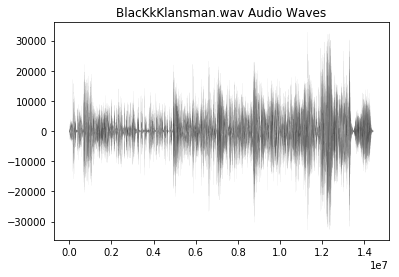

<Figure size 1080x720 with 0 Axes>

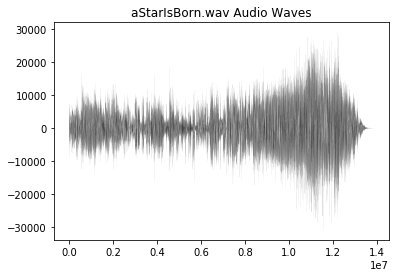

<Figure size 1080x720 with 0 Axes>

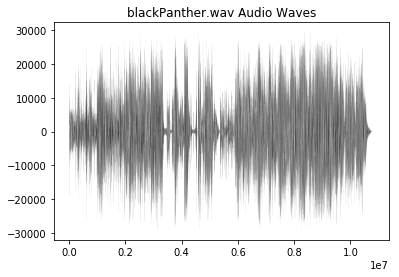

<Figure size 1080x720 with 0 Axes>

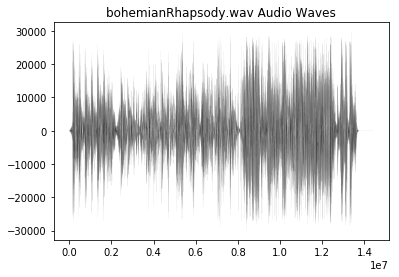

<Figure size 1080x720 with 0 Axes>

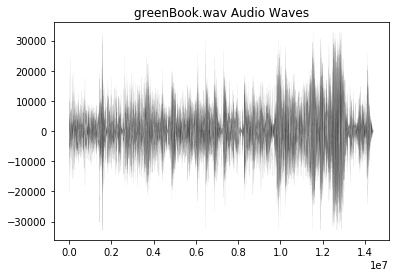

<Figure size 1080x720 with 0 Axes>

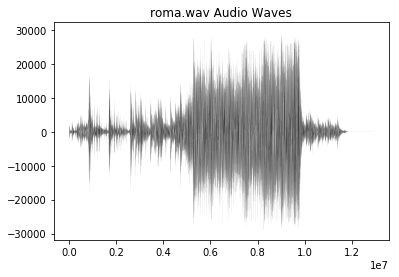

<Figure size 1080x720 with 0 Axes>

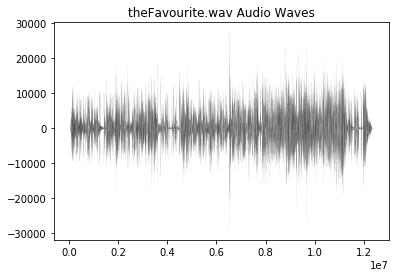

<Figure size 1080x720 with 0 Axes>

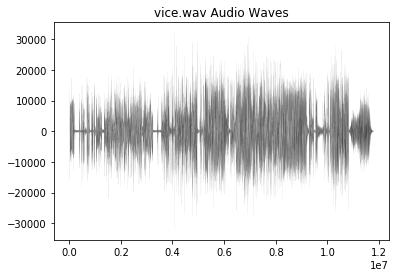

<Figure size 1080x720 with 0 Axes>

In [32]:
files = sorted(os.listdir("input"))

for file in files:
    trailerAudio = wave.open('input/' + file,'r')

    #Extract Raw Audio from Wav File
    signal = trailerAudio.readframes(-1)
    signal = np.fromstring(signal, 'Int16')
    #use pd diff
#     signal = pd.Series(signal).diff(1)

    #If Stereo
    # if spf.getnchannels() == 2:
    #     print('Just mono files')
    #     sys.exit(0)

    plt.figure(1)
#     plt.ax(linewidth=0.1)
    plt.title(file + ' Audio Waves')
    plt.plot(signal, linewidth=.03, color="black")
    plt.figure(figsize=(15,10))
#     plt.save(file + ' Audio Waves.png')
    plt.show()